###Tasks to be performed:
- Analysing the present condition in USA
- Exploring the world wide data
- Forecasting the world wide COVID-19 cases

###Importing the required libraries

In [ ]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

# Part 1: Analysing the present condition in USA


## 1.1 Reading the Datasets


In [ ]:
df= pd.read_excel('CovidUS.xlsx')
df['recovered'] = df['recovered'].fillna(0).astype(int)
df.head(5)

,state,positive,recovered,death
0,AK,56886,0,305
1,AL,499819,295690,10148
2,AR,324818,315517,5319
3,AS,0,0,0
4,AZ,826454,0,16328


## 1.2 Analysing COVID19 Cases in US




In [ ]:
total_cases = df['positive'].sum()
print('Total number of confirmed COVID 2019 cases across US till date (7th March, 2021):', total_cases)

Total number of confirmed COVID 2019 cases across US till date (7th March, 2021): 28756184


In [ ]:
df.fillna(0).head(30).style.background_gradient(cmap='Reds')

,state,positive,recovered,death,Total Active
0,AK,56886,0,305,56581
1,AL,499819,295690,10148,193981
2,AR,324818,315517,5319,3982
3,AS,0,0,0,0
4,AZ,826454,0,16328,810126
5,CA,3501394,0,54124,3447270
6,CO,436602,0,5989,430613
7,CT,285330,0,7704,277626
8,DC,41419,29570,1030,10819
9,DE,88354,0,1473,86881


**Visualization Inference:** 
...
...
...

## 1.3 Number of Active COVID-19 cases in affected State/Union Territories   

In [ ]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['positive'] - (df['death'] + df['recovered'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 19 cases across US:', total_active)
Tot_Cases = df.groupby('state')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 19 cases across US: 17307094


,Total Active
state,
CA,3447270
FL,1876943
NY,1642140
IL,1175321
GA,1005581
NC,860674
AZ,810126
NJ,789035
IN,654525


## 1.4 Visualising the spread geographically

In [ ]:
US_coor = pd.read_excel('US_coor.xlsx')

In [ ]:
# Learn how to use folium to create a zoomable map
df_full = pd.merge(US_coor,df,on='state')
map = folium.Map(location=[48, -102], zoom_start=4,tiles='Stamen Terrain')

for lat, lon, value, name in zip(df_full['latitude'], df_full['longitude'], df_full['positive'], df_full['state']):
    folium.CircleMarker([lat, lon], radius=value*0.00004+5, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

## 1.5 Confirmed vs Recovered figures

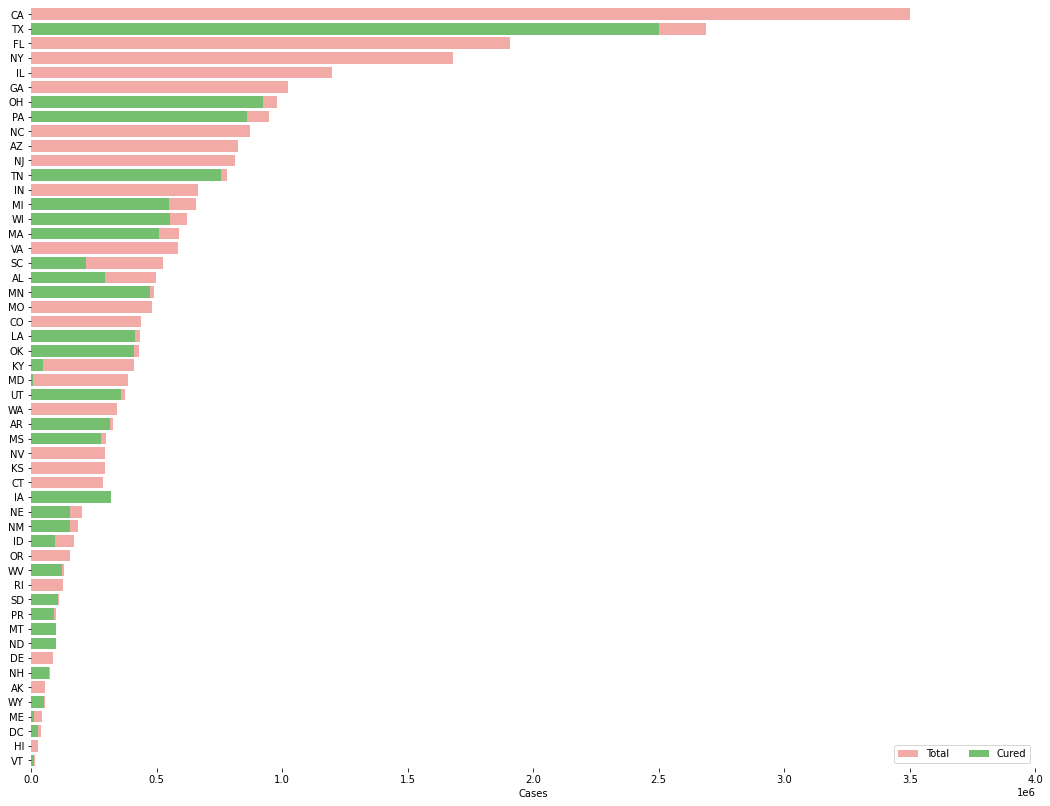

In [ ]:
f, ax = plt.subplots(figsize=(18, 14))
data = df_full[['state','positive','recovered','death']]
data.sort_values('positive',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="positive", y="state", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="recovered", y="state", data=data, label="Cured", color="g")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 4000000), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

## 1.6 How the Coronavirus cases are rising?

In [ ]:
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'
dbd_US = pd.read_csv('national-history.csv')

In [ ]:
dbd_US.head(3)

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
0,2021-03-01,504488.0,1241,44956.0,9595.0,1024,46738.0,869030.0,116726735.0,312729,4252.0,3171.0,28399281.0,48092,56,355718749,1224297
1,2021-02-28,503247.0,1051,44907.0,9802.0,879,47352.0,868006.0,116414006.0,293739,4252.0,3245.0,28351189.0,54349,56,354494452,1361442
2,2021-02-27,502196.0,1847,44875.0,10114.0,1428,48871.0,867127.0,116120267.0,407753,4252.0,3335.0,28296840.0,71245,56,353133010,1670548


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_US['date'], y = dbd_US['positive'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in USA (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

import plotly.express as px
fig = px.bar(dbd_US, x="date", y="positiveIncrease", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in USA on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

In [ ]:
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


>> a. Neighboring states



In [ ]:
df = pd.read_csv('all-states-history.csv')
df.head(5)

In [ ]:
import numpy as np

In [ ]:
nonn = pd.read_csv('neigh.csv',index_col=0)
nonn.sample(3)

,first_state,second_state,code
1275,NE,WA,Non_N
1752,RI,FL,Non_N
431,CT,AR,Non_N


In [ ]:
adj = list(zip(nonn[nonn['code']=='Neigh']['first_state'],nonn[nonn['code']=='Neigh']['second_state']))
not_adj = list(zip(nonn[nonn['code']!='Neigh']['first_state'],nonn[nonn['code']!='Neigh']['second_state']))

In [ ]:
def f(rmse,r2,lst):
  count = 0
  for s1,s2 in lst:
    dff = df[0:0].copy()
    for i in df['date'].unique().tolist():
      #For 2 certain states, select days such that both state has data in those days
      if ((df['state'] == s1) & (df['date'] == i)).any() == True and ((df['state'] == s2) & (df['date'] == i)).any() == True:
        df1 = df[((df['state'] == s1) & (df['date'] == i))].copy()
        df2 = df[((df['state'] == s2) & (df['date'] == i))].copy()
        dff = dff.append(df1)
        dff = dff.append(df2)
        dff = dff.sort_values(by=['state','date'])
    x = int(len(dff)/2)
    X_train = pd.DataFrame(dff[:x]['positiveIncrease'])
    y_train = pd.DataFrame(dff[x:]['positiveIncrease'])
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)

    mse = mean_sq_err(X_train,y_pred)
    
    rmse.append(np.sqrt(mse))
    r2.append(model.score(X_train, y_train))

    count+=1
    if count == 30:
      break


In [ ]:
rmse_adj = []
rmse_not_adj = []
r2_adj = []
r2_not_adj = []

In [ ]:
f(rmse_adj,r2_adj,adj)
f(rmse_not_adj,r2_not_adj,not_adj)

In [ ]:
sum(r2_adj)/len(r2_adj)

0.5238357479107267

In [ ]:
sum(r2_not_adj)/len(r2_not_adj)

0.43634713969176264

In [ ]:
np.std(r2_not_adj)

0.1708193879114083

In [ ]:
#Non-neighboring states
sum(r2_not_adj)/len(r2_not_adj)/2

0.21817356984588132

In [ ]:
sum(rmse_adj)/len(rmse_adj)

3158.109772471339